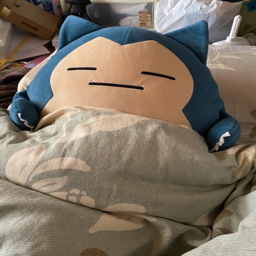

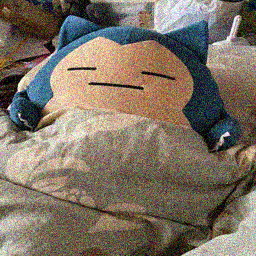

In [5]:
from PIL import Image
import numpy as np
import cupy as cp


images = []

img = Image.open("kabin.jpg")

# 256 * 256 * 3
start_image = img.resize((256, 256))
images.append(start_image)

# Normalize [0 ~ 1]
x = cp.array(start_image) / 255

# hyper parameter
time = 10
beta_start = 10e-4
beta_end = 10e-3 * 2
betas = []
for i in range(time):
    betas.append(beta_start + ((beta_end - beta_start) / 1000) * i) # Linear scheling

alpha_ = 1
for beta in betas:
    alpha = 1 - beta
    alpha_ *= alpha

# Noising
x_start = x

noise = cp.random.normal(
    loc=0,
    scale=1,
    size=x_start.shape
)

x_end = cp.sqrt(alpha_) * x_start + cp.sqrt(1.0 - alpha_) * noise
x_end = x_end * 255

pil_image = Image.fromarray(cp.asnumpy(np.clip(x_end, 0, 255).astype("uint8")))
images.append(pil_image)

for image in images:
    display(image)

In [6]:
from PIL import Image
import numpy as np
import cupy as cp


images = []

img = Image.open("kabin.jpg")

# 256 * 256 * 3
start_image = img.resize((256, 256))
images.append(start_image)

# Normalize [0 ~ 1]
x = cp.array(start_image) / 255

# hyper parameter
time = 200
beta_start = 10e-4
beta_end = 10e-3 * 2
betas = []
for i in range(time):
    betas.append(beta_start + ((beta_end - beta_start) / 1000) * i) # Linear scheling

alpha_ = 1
alpha_t = []
for time, beta in enumerate(betas, start=1):
    alpha = 1 - beta
    alpha_ *= alpha

    if time % 10 == 0:
        alpha_t.append(alpha_)

# Noising
x_start = x
for alpha_ in alpha_t:
    noise = cp.random.normal(
        loc=0,
        scale=1,
        size=x_start.shape
    )

    x_end = cp.sqrt(alpha_) * x_start + cp.sqrt(1.0 - alpha_) * noise
    x_start = x_end

    x_end = x_end * 255

    pil_image = Image.fromarray(cp.asnumpy(np.clip(x_end, 0, 255).astype("uint8")))
    images.append(pil_image)

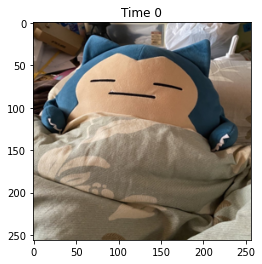

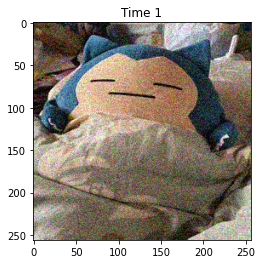

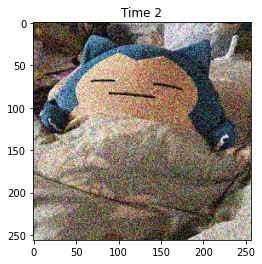

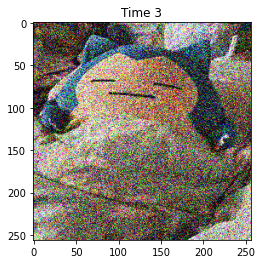

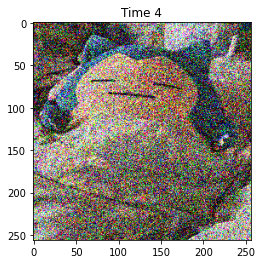

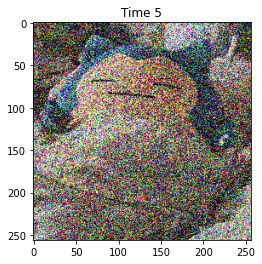

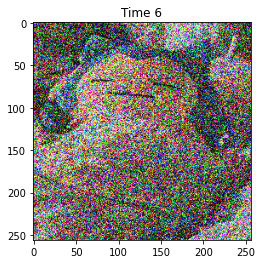

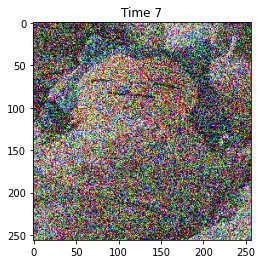

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

for t, image in enumerate(images):
    fig, ax = plt.subplots()
    ax.imshow(image)
    plt.title(f"Time {t}")
    plt.show()


In [ ]:
images[0].save('noising.gif',
               save_all=True, append_images=images[1:], optimize=False, duration=200, loop=0)